<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_14_NN_Forestfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as pd
import pandas as pd

In [80]:
fire = pd.read_csv('forestfires.csv')
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [81]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [82]:
fire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [83]:
fire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [84]:
fire.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
fire.day.replace(('mon','tue','wed','thu','fri','sat','sun'), (1,2,3,4,5,6,7), inplace=True)

In [85]:
fire['month'] = fire['month'].astype('int')
fire['day'] = fire['day'].astype('int')

In [86]:
size = pd.get_dummies(fire['size_category'], drop_first=True)

In [87]:
fire1 = pd.concat([fire,size],axis=1)
fire1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,small
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,1


In [88]:
size

,small
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [89]:
fire1 = fire1.drop(['month','day','size_category'],axis=1)

In [90]:
fire1.shape

(517, 29)

In [91]:
X=fire1.iloc[:,0:28]
y=fire1['small']

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [94]:
scaled_train= scaler.fit_transform(X_train)
scaled_test= scaler.transform(X_test)

In [95]:
scaled_train.shape, scaled_test.shape, y_train.shape, y_test.shape

((361, 28), (156, 28), (361,), (156,))

In [105]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

In [106]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
history = model.fit(scaled_train, y_train, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
25/25 [==============================] - 0s 12ms/step - loss: 0.0641 - accuracy: 0.9959 - val_loss: 1.8211 - val_accuracy: 0.8083
Epoch 2/150
25/25 [==============================] - 0s 7ms/step - loss: 0.0636 - accuracy: 0.9959 - val_loss: 1.8182 - val_accuracy: 0.8083
Epoch 3/150
25/25 [==============================] - 0s 8ms/step - loss: 0.0651 - accuracy: 0.9959 - val_loss: 1.6334 - val_accuracy: 0.8083
Epoch 4/150
25/25 [==============================] - 0s 8ms/step - loss: 0.0650 - accuracy: 0.9959 - val_loss: 1.9134 - val_accuracy: 0.8083
Epoch 5/150
25/25 [==============================] - 0s 9ms/step - loss: 0.0645 - accuracy: 0.9959 - val_loss: 1.7305 - val_accuracy: 0.8083
Epoch 6/150
25/25 [==============================] - 0s 8ms/step - loss: 0.0644 - accuracy: 0.9959 - val_loss: 1.9133 - val_accuracy: 0.8083
Epoch 7/150
25/25 [==============================] - 0s 6ms/step - loss: 0.0649 - accuracy: 0.9959 - val_loss: 1.9120 - val_accuracy: 0.8167
Epoch 8/150


In [134]:
scores = model.evaluate(scaled_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 1.6742 - accuracy: 0.8397
accuracy: 83.97%


In [136]:
model.history.history.keys()

dict_keys([])

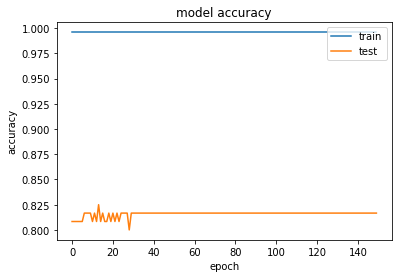

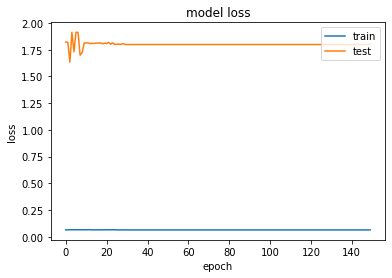

In [138]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
